# Arbeidsark: bivariat Dataanalyse i Python

## Målsetninger:
- Laste inn et datasett fra en CSV-fil
- Gjennomføre bivariat analyse
  - kryss tabulering 
  - korrelasjonsanalyse 
  - uavhengige t-test
- Visualisere bivariate sammenhenger 

## Oppgaver for modulen 
- Last inn datasettet og inspiser de første radene.
- Klassifiser variablene som numeriske eller kategoriske.
- Beregn beskrivende statistikk for én numerisk variabel.
- Visualiser den valgte variabelen med en passende plot.
- Lag en ny variabel basert på eksisterende variabler.
- Lagre det modifiserte datasettet.

### Aller første du må gjøre, er å importere biblioteker som skal brukes

In [3]:
# Step 1: Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind



## 1. Last inn datasettet
(Husk å kjør koden i data-cellene for å få resultater. Dette gjøres ved å sette markøren i cellen, og enten klikke [ctrl]+[enter] på tastaturet, eller klikke "play" knappen på menyen over.

In [4]:
# Load the dataset from a CSV file
# Replace 'your_file.csv' with the path to your dataset
file_path = 'Data/HRGender.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()

,jobTitle,gender,age,perfEval,edu,dept,seniority,basePay,bonus
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938
1,Software Engineer,Male,21,5,College,Management,5,108476,11128
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319


## 1b: Still noen forskningsspørsmål
Se på variablene, og lag noen aktuelle forsknignsspørsmål. Husk på kravene til gode spørsmål. 
Et slik kan være: "Er det forskjell på lønn for menn og kvinner?" 

### skriv inn spørsmål her: 

......


## 2. Krysstabeller
Krysstabeller brukes til å analysere sammenhengen mellom to kategoriske variabler.

### oppgave:
Utfør krysstabellanalyse for to kategoriske variabler etter eget valg, og visualiser sammenhengen med et varmekart.


Cross Table:
dept         Administration  Engineering  Management  Operations  Sales
edu                                                                    
College                  52           39          52          49     49
High School              47           50          54          55     59
Masters                  52           53          46          54     51
PhD                      42           50          46          52     48


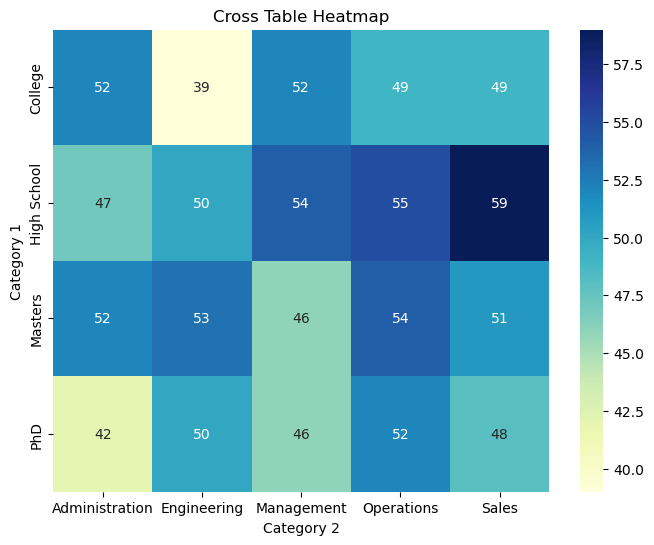

In [5]:
# Create a cross table for two categorical variables
# Replace 'category1' and 'category2' with variable names
cross_tab = pd.crosstab(data['edu'], data['dept'])
print("Cross Table:")
print(cross_tab)

# Visualize the cross table as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cross_tab, annot=True, cmap="YlGnBu", fmt="d")
plt.title("Cross Table Heatmap")
plt.xlabel("Category 2")
plt.ylabel("Category 1")
plt.show()

## 3. Korrelasjonsanalyse
Korrelasjon måler styrken og retningen på sammenhengen mellom to numeriske variabler.
### oppgave:
Beregn korrelasjon mellom to numeriske variabler, og visualiser sammenhengen ved hjelp av et spredningsplott.

In [6]:
from scipy.stats import pearsonr
# Correlation analysis for PerfScoreID and Salary with p-value
if 'basePay' in data.columns and 'bonus' in data.columns:
    corr, p_value = pearsonr(data['basePay'], data['bonus'])
    print(f"\nCorrelation between PerfScoreID and Salary: {corr}")
    print(f"p-value: {p_value}")
    if p_value < 0.01:
        print("The correlation is statistically significant at the 0.01 level.")
    else:
        print("The correlation is not statistically significant at the 0.01 level.")
else:
    print("\nColumns 'PerfScoreID' and 'Salary' not found in the dataset.")


Correlation between PerfScoreID and Salary: -0.1294807048262263
p-value: 4.0132208931259664e-05
The correlation is statistically significant at the 0.01 level.



Correlation between PerfScoreID and Salary: -0.1294807048262263
p-value: 4.0132208931259664e-05
The correlation is statistically significant at the 0.01 level.
      


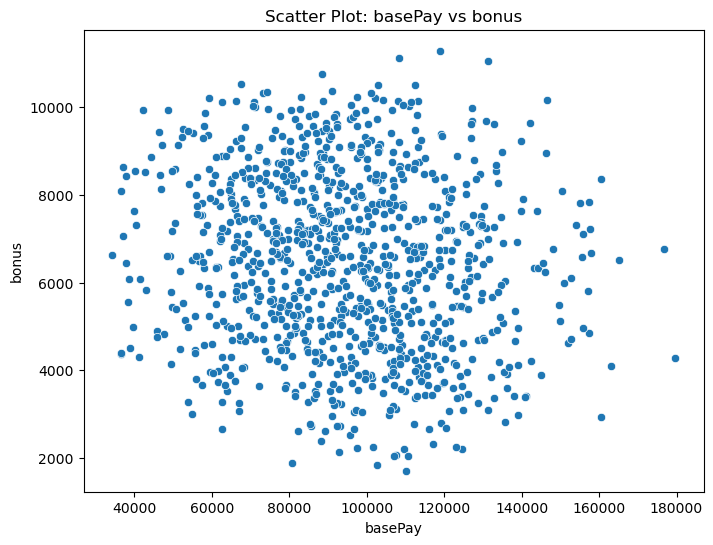

In [10]:
from scipy.stats import pearsonr
# Compute the correlation between two numerical variables
# Replace 'numerical1' and 'numerical2' with column names
numerical1 = 'basePay'
numerical2 = 'bonus'

corr, p_value = pearsonr(data[numerical1], data[numerical2])
print(f"\nCorrelation between PerfScoreID and Salary: {corr}")
print(f"p-value: {p_value}")
if p_value < 0.01:
      print("The correlation is statistically significant at the 0.01 level.")
      print("      ")
else:
      print("The correlation is not statistically significant at the 0.01 level.")

# Visualize the relationship with a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data[numerical1], y=data[numerical2])
plt.title(f"Scatter Plot: {numerical1} vs {numerical2}")
plt.xlabel(numerical1)
plt.ylabel(numerical2)
plt.show()

## 4. T-test for uavhengige utvalg
### Histogram for numeriske data
T-tester sammenligner gjennomsnittene for to uavhengige grupper for en numerisk variabel.

### oppgave:
Utfør en t-test for uavhengige utvalg for å avgjøre om det er en signifikant forskjell mellom to grupper for en numerisk variabel. En av analysene skal være på kjønn.
Tolk resultatene

T-Statistic: -0.10133940723793167
P-Value: 0.919301390176108


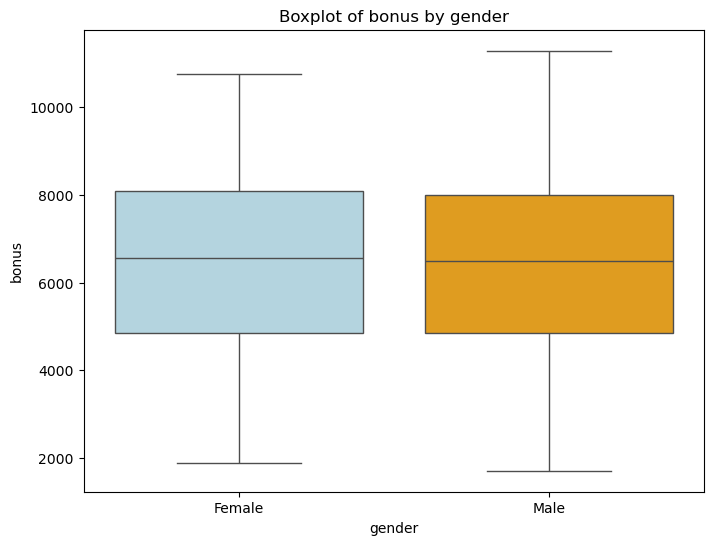

In [14]:
# Perform a t-test for two groups in a categorical variable and a numerical variable
# Replace 'numerical' with the numerical variable name and 'category' with the categorical variable name
numerical = 'bonus'
category = 'gender'

# Ensure the categorical variable has exactly two groups (Hint: pass på å definer hva hver av verdiene heter i datasettet)
group1 = data[data[category] == 'Male'][numerical]
group2 = data[data[category] == 'Female'][numerical]

# Perform the t-test
t_stat, p_value = ttest_ind(group1, group2, nan_policy='omit')
print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")

# Visualize the group differences with a boxplot
# Custom colors for the boxplot
custom_palette = {'Female': 'lightblue', 'Male': 'orange'}
plt.figure(figsize=(8, 6))
sns.boxplot(x=category, y=numerical,hue=category, data=data, palette=custom_palette)
plt.title(f"Boxplot of {numerical} by {category}")
plt.xlabel(category)
plt.ylabel(numerical)
plt.show()

## 5. Chi-Squared test for to kategoriske variabler
Chi-Squared tester for sammenhenger mellom to kategoriske variabler. 

### Oppgave
Finn minst to kategoriske variabler og test for en sammenheng

In [15]:
from scipy.stats import chi2_contingency

# Create a contingency table (cross-tabulation) for two categorical variables
# Replace 'category1' and 'category2' with column names
category1 = 'gender'
category2 = 'edu'

contingency_table = pd.crosstab(data[category1], data[category2])

# Perform the chi-squared test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Display results
print("Chi-Squared Test Results")
print(f"Chi-squared statistic: {chi2}")
print(f"P-value: {p_value}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

# Interpret the result
if p_value < 0.05:
    print("There is a statistically significant association between the variables (p < 0.05).")
else:
    print("There is no statistically significant association between the variables (p ≥ 0.05).")

Chi-Squared Test Results
Chi-squared statistic: 5.766087051757465
P-value: 0.12356206838006176
Degrees of freedom: 3
Expected frequencies:
[[112.788 124.02  119.808 111.384]
 [128.212 140.98  136.192 126.616]]
There is no statistically significant association between the variables (p ≥ 0.05).


## 6. Drøft innsikter
I analysene over, bør du ha fått noen innsikter fra analysene, og tolk visualiseringene. Presenter disse her: 
(Hint: hva ser du om sammenheng mellom forskjellige typer variabler: kategoriske, numeriske, m.m. om variablene du så på?)
Sørg for at du har svart på spørsmålene du stilte øverst. 

### Skriv svaret her
...